In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
path = "C:\\Users\\Ufuk Altan\\Downloads\\Downloads\\Data Science\\PyFinance\\08 - Time series stock data\\"
fb = pd.read_csv(path + 'ticker-fb.csv', index_col = 0, parse_dates = True)
fb.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,181.580002,177.550003,177.679993,181.419998,18151900,181.419998
2018-01-03,184.779999,181.330002,181.880005,184.669998,16886600,184.669998
2018-01-04,186.210007,184.100006,184.899994,184.330002,13880900,184.330002
2018-01-05,186.899994,184.929993,185.589996,186.850006,13574500,186.850006
2018-01-08,188.899994,186.330002,187.199997,188.279999,17994700,188.279999


In [10]:
fb['TP'] = (fb['High'] + fb['Low'] + fb['Close']) / 3

In [11]:
fb['STD'] = fb['TP'].rolling(20).std(ddof = 0)

In [12]:
fb['MA-TP'] = fb['TP'].rolling(20).mean()

In [13]:
fb['BOLU'] = fb['MA-TP'] + 2 * fb['STD']
fb['BOLD'] = fb['MA-TP'] - 2 * fb['STD']

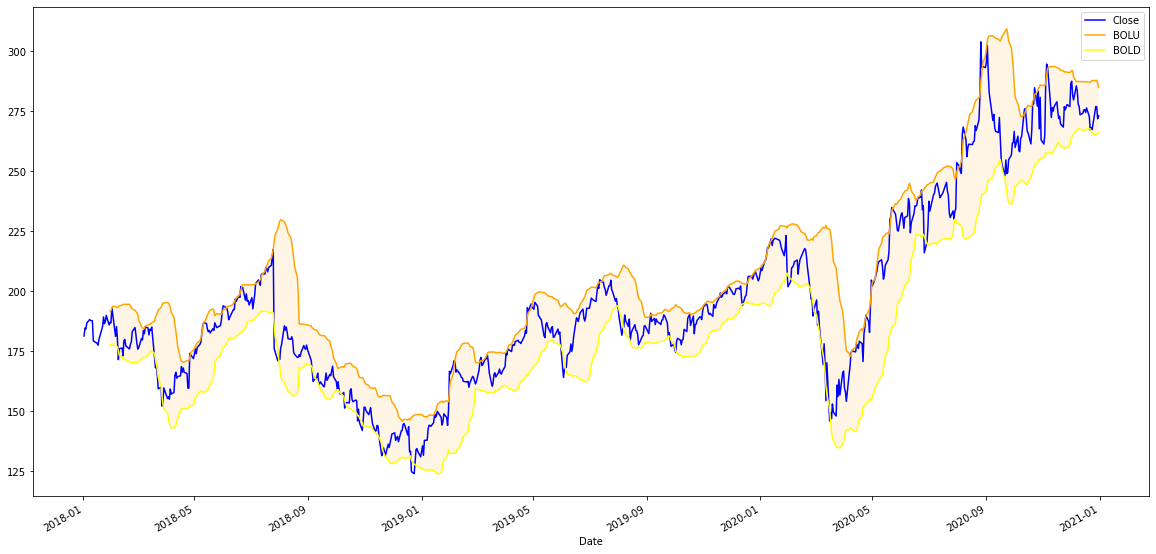

In [26]:
fb[['Close', 'BOLU', 'BOLD']] .plot(figsize = (20,10), color = ['blue', 'orange', 'yellow'])
plt.fill_between(fb.index, fb['BOLD'], fb['BOLU'], facecolor = 'orange', alpha = 0.1)

In [34]:
def bollinger_bands(stock):

    stock['TP'] = (stock['High'] + stock['Low'] + stock['Close']) / 3
    stock['STD'] = stock['TP'].rolling(20).std(ddof = 0)
    stock['MA-TP'] = stock['TP'].rolling(20).mean()

    stock['BOLU'] = stock['MA-TP'] + 2 * stock['STD']
    stock['BOLD'] = stock['MA-TP'] - 2 * stock['STD']
    
    return "Bollinger Bands Calculated"